<a href="https://colab.research.google.com/github/afitmaulatokz-blip/UTS_Pengolahan_Citra_Digital/blob/main/PRAKTIKUM_PENGOLAHAN_CITRA_DIGITAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3559773656.py:10: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img))
/tmp/ipython-input-3559773656.py:10: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img))
/tmp/ipython-input-3559773656.py:11: RuntimeWarning: divide by zero encountered in log
  log_img = c * np.log(1 + img)
/tmp/ipython-input-3559773656.py:11: RuntimeWarning: invalid value encountered in multiply
  log_img = c * np.log(1 + img)
/tmp/ipython-input-3559773656.py:12: RuntimeWarning: invalid value encountered in cast
  log_img = np.array(log_img, dtype=np.uint8)
/tmp/ipython-input-3559773656.py:36: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0,256])


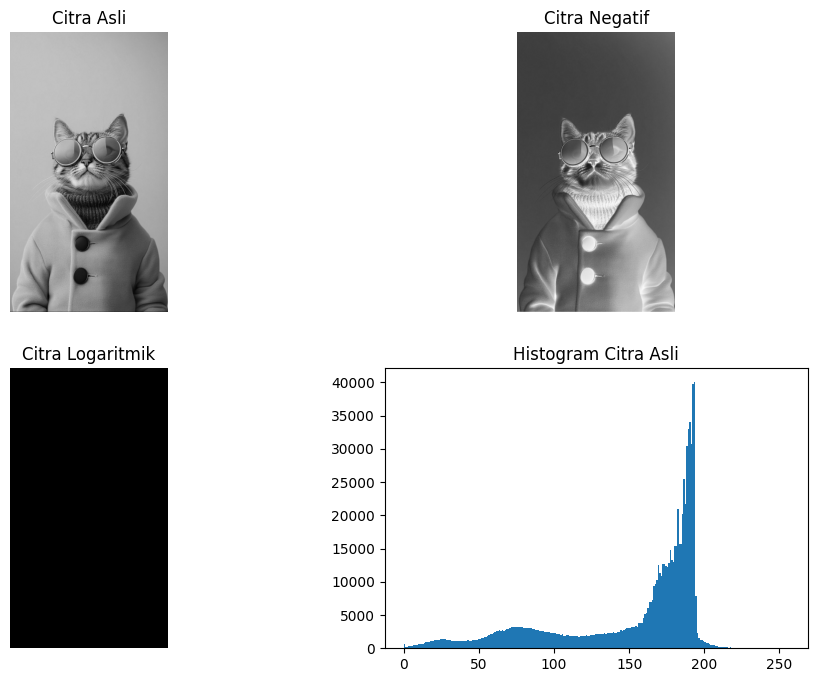

Analisis Soal 1:
- Transformasi negatif membalikkan nilai intensitas piksel.
- Transformasi logaritmik menonjolkan area gelap agar detail terlihat.
- Logaritmik lebih berguna untuk citra dengan pencahayaan tidak merata atau terlalu gelap.



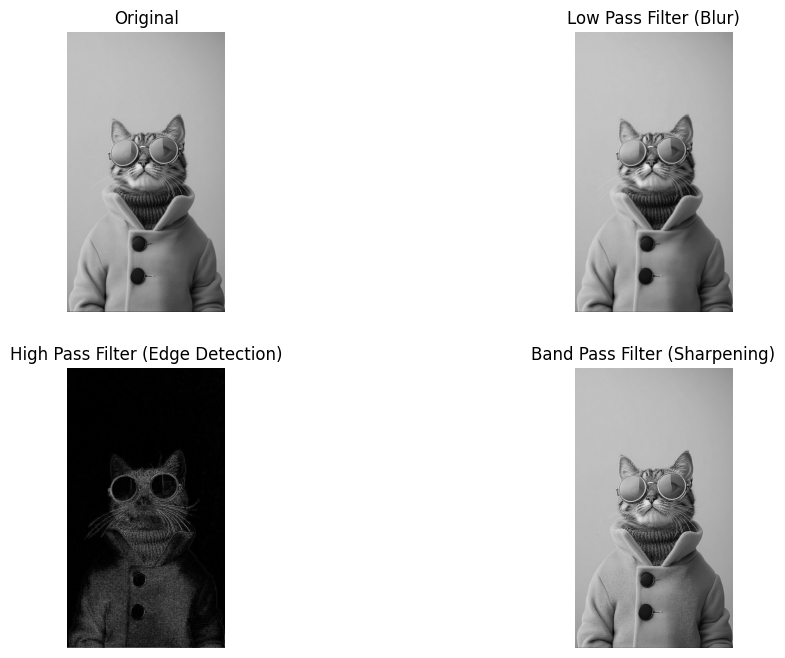

Nilai Rata-rata Piksel:
Original : 150.98
LPF       : 151.00
HPF       : 17.98
BPF       : 151.83

Analisis Soal 2:
- LPF menghaluskan citra dengan mengurangi noise dan detail.
- HPF menyoroti tepi dan garis tegas.
- BPF menggabungkan efek halus dan tajam (sharpening).
- Domain spasial mengacu pada operasi langsung di piksel, sedangkan domain frekuensi menganalisis komponen sinyal berdasarkan frekuensi citra.

Hasil Konvolusi Soal 3:
Σ(f × kernel) = -30
Nilai akhir (absolute) = 30

Interpretasi:
- Nilai negatif menunjukkan perbedaan intensitas yang kuat di area tengah.
- HPF digunakan untuk mendeteksi tepi karena memberikan nilai tinggi di area dengan perubahan intensitas besar.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

img = cv2.imread('KUCING.jpg', cv2.IMREAD_GRAYSCALE)

negatif = 255 - img

c = 255 / np.log(1 + np.max(img))
log_img = c * np.log(1 + img)
log_img = np.array(log_img, dtype=np.uint8)

def plot_histogram(image, title):
    plt.hist(image.ravel(), 256, [0,256])
    plt.title(title)
    plt.show()

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(negatif, cmap='gray')
plt.title('Citra Negatif')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(log_img, cmap='gray')
plt.title('Citra Logaritmik')
plt.axis('off')

plt.subplot(2,2,4)
plt.hist(img.ravel(), 256, [0,256])
plt.title('Histogram Citra Asli')
plt.show()

print("Analisis Soal 1:")
print("- Transformasi negatif membalikkan nilai intensitas piksel.")
print("- Transformasi logaritmik menonjolkan area gelap agar detail terlihat.")
print("- Logaritmik lebih berguna untuk citra dengan pencahayaan tidak merata atau terlalu gelap.\n")

LPF = (1/9) * np.ones((3,3))
HPF = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
BPF = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

img_LPF = cv2.filter2D(img, -1, LPF)
img_HPF = cv2.filter2D(img, -1, HPF)
img_BPF = cv2.filter2D(img, -1, BPF)

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(img_LPF, cmap='gray')
plt.title('Low Pass Filter (Blur)')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(img_HPF, cmap='gray')
plt.title('High Pass Filter (Edge Detection)')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(img_BPF, cmap='gray')
plt.title('Band Pass Filter (Sharpening)')
plt.axis('off')
plt.show()

print("Nilai Rata-rata Piksel:")
print(f"Original : {np.mean(img):.2f}")
print(f"LPF       : {np.mean(img_LPF):.2f}")
print(f"HPF       : {np.mean(img_HPF):.2f}")
print(f"BPF       : {np.mean(img_BPF):.2f}")

print("\nAnalisis Soal 2:")
print("- LPF menghaluskan citra dengan mengurangi noise dan detail.")
print("- HPF menyoroti tepi dan garis tegas.")
print("- BPF menggabungkan efek halus dan tajam (sharpening).")
print("- Domain spasial mengacu pada operasi langsung di piksel, sedangkan domain frekuensi menganalisis komponen sinyal berdasarkan frekuensi citra.\n")

f = np.array([[100,90,80],
              [60,50,40],
              [30,20,10]])

hpf_kernel = np.array([[-1,-1,-1],
                       [-1,8,-1],
                       [-1,-1,-1]])

hasil = np.sum(f * hpf_kernel)

print("Hasil Konvolusi Soal 3:")
print(f"Σ(f × kernel) = {hasil}")
print(f"Nilai akhir (absolute) = {abs(hasil)}")

print("\nInterpretasi:")
print("- Nilai negatif menunjukkan perbedaan intensitas yang kuat di area tengah.")
print("- HPF digunakan untuk mendeteksi tepi karena memberikan nilai tinggi di area dengan perubahan intensitas besar.")
